In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/global-youtube-statistics-2023'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv


First import our csv file.

In [2]:
df = pd.read_csv(r"/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv", encoding="latin-1")

Check if the file is impoted properly or not.

In [3]:
df.head(20)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891



**We will run df.infoTo quickly inspect the dataset structure.To identify missing data and column data types.To check the size and memory efficiency of the DataFrame.**
# 

In [4]:
df.info

<bound method DataFrame.info of      rank                    Youtuber  subscribers   video views  \
0       1                    T-Series    245000000  2.280000e+11   
1       2              YouTube Movies    170000000  0.000000e+00   
2       3                     MrBeast    166000000  2.836884e+10   
3       4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4       5                   SET India    159000000  1.480000e+11   
..    ...                         ...          ...           ...   
990   991               Natan por Aï¿     12300000  9.029610e+09   
991   992    Free Fire India Official     12300000  1.674410e+09   
992   993                       Panda     12300000  2.214684e+09   
993   994                 RobTopGames     12300000  3.741235e+08   
994   995                Make Joke Of     12300000  2.129774e+09   

             category                       Title  uploads         Country  \
0               Music                    T-Series    20082           Indi

**Lets findout missing data.**

In [5]:
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 


**We want to predict category for NaN places based on other features usnig LogisticRegression.However the problem is our selected features for prediction are categorical,so we are going to treat them accordingly! features = ['youtuber','title'] and  target = 'category'**


In [6]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assume `df` is your DataFrame
df = df.copy()  # Work on a copy

# Separate rows with and without missing 'Category'
df_train = df[df['category'].notna()]
df_predict = df[df['category'].isna()]

# Encode categorical target variable
le = LabelEncoder()
df_train['category_encoded'] = le.fit_transform(df_train['category'])


/tmp/ipykernel_17/11554511.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['category_encoded'] = le.fit_transform(df_train['category'])


In [7]:
# Select features and target
features = ['subscribers', 'video views', 'uploads', 'Country', 'channel_type']
X_train = pd.get_dummies(df_train[features], drop_first=True)  # Encode categorical variables
y_train = df_train['category_encoded']

# For prediction rows, prepare the features
X_predict = pd.get_dummies(df_predict[features], drop_first=True)

# Align columns of training and prediction data
X_predict = X_predict.reindex(columns=X_train.columns, fill_value=0)


In [8]:
# Split data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)

# Validate model
y_val_pred = model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")


Validation Accuracy: 0.26


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Predict missing values
y_predict = model.predict(X_predict)

# Decode the predicted labels back to the original category names
df_predict['category'] = le.inverse_transform(y_predict)

# Combine predicted and non-missing rows
df_filled = pd.concat([df_train, df_predict]).sort_index()


/tmp/ipykernel_17/3326388543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['category'] = le.inverse_transform(y_predict)


In [10]:
print(df_filled['category'].isna().sum())  # Should be 0
df_filled.to_csv("filled_dataset.csv", index=False)

0


In [11]:
print(df_filled.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

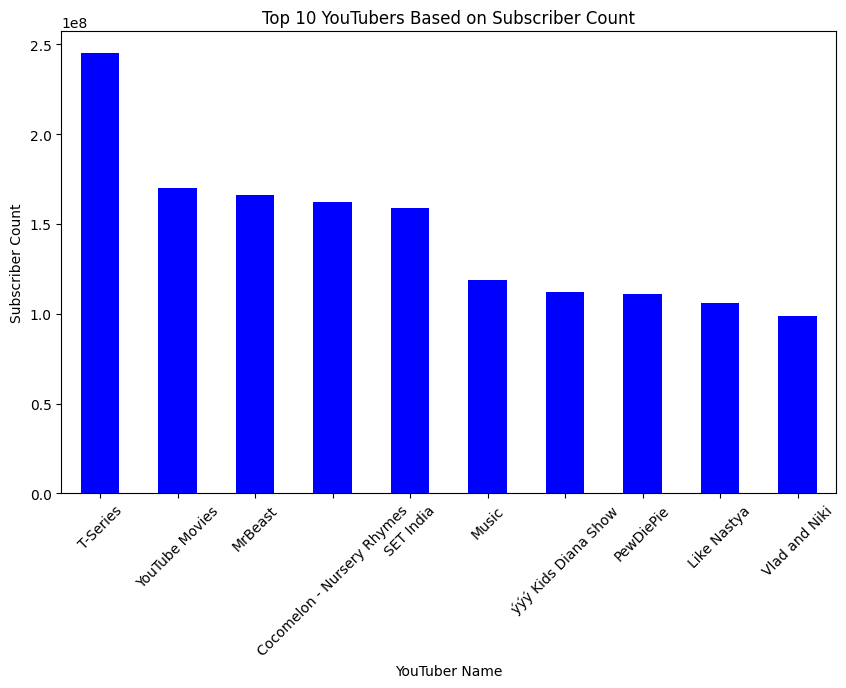

In [12]:
import matplotlib.pyplot as plt

# Ensure these variables are correctly defined
# Get top 10 YouTubers based on subscriber count
top_youtubers = df_filled.groupby('Youtuber')['subscribers'].sum().sort_values(ascending=False).iloc[0:10]

# Plot
plt.figure(figsize=(10, 6))  # Set the figure size before plotting
ax = top_youtubers.plot(kind='bar', color='blue', title="Top 10 YouTubers Based on Subscriber Count")

# Customize the plot
ax.set_xlabel("YouTuber Name")
ax.set_ylabel("Subscriber Count")
ax.set_xticklabels(top_youtubers.index, rotation=45)  # Properly label X-axis

plt.show()


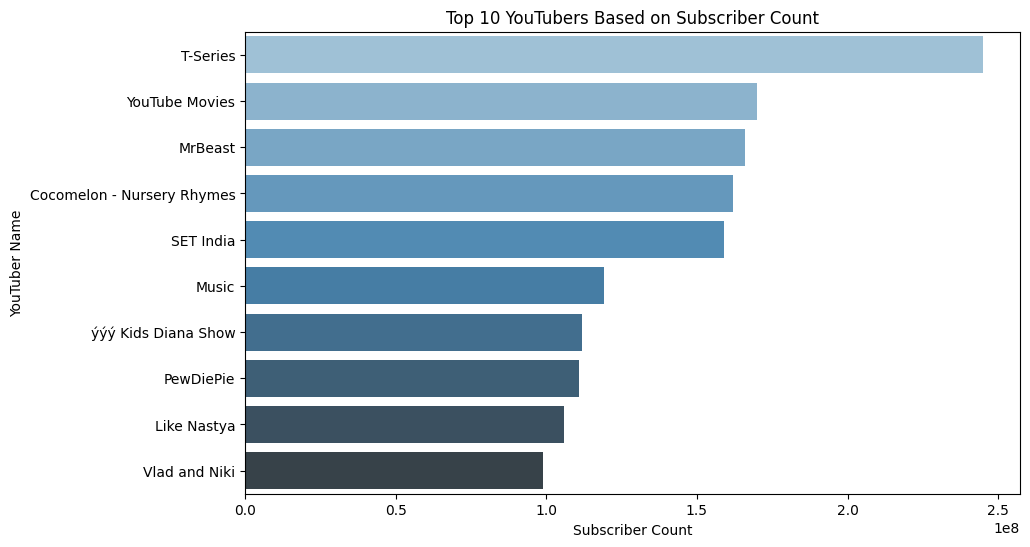

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 YouTubers based on subscribers
top_youtubers = df_filled.groupby('Youtuber')['subscribers'].sum().sort_values(ascending=False).iloc[0:10]

# Convert to DataFrame for plotting
top_youtubers_df = top_youtubers.reset_index()

# Plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(
    x='subscribers', 
    y='Youtuber', 
    data=top_youtubers_df, 
    palette='Blues_d'
)

# Add titles and labels
plt.title("Top 10 YouTubers Based on Subscriber Count")
plt.xlabel("Subscriber Count")
plt.ylabel("YouTuber Name")

plt.show()
